<h1>Comments on Notebook</h1>
<p>trying something alternative on a differen dataset following a well established example to see if I can find my way back to the right path

Why is it that examples work fantastc but yours don't???</p>


In [6]:
from tensorflow import keras
from keras.datasets import imdb 
import numpy as np 

In [7]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [8]:
train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])

9999

In [9]:
def vectorize_sequences(sequences, dim=10000):
    # Initialize a matrix of zeros with shape (number of sequences x dimensions [10,000])
    results = np.zeros((len(sequences), dim))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # Set specific indices for each sequence to 1s
    return results

In [10]:
# Example usage of the vectorization function
x_train = vectorize_sequences(train_data)
print(x_train[0])  # Display the first vectorized training example
x_test = vectorize_sequences(test_data)
print(x_test[0])  # Display the first vectorized training example

[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]


In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [13]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


# Correctly defining the model with a list of layers directly passed to Sequential
model = Sequential([
    Input(shape=(10000,)),  # Define the input shape
    Dense(16, activation='relu'),  # First dense layer
    Dense(16, activation='relu'),  # Second dense layer
    Dense(1, activation='sigmoid')  # Output layer
])

In [14]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [21]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.7021 - loss: 0.6011 - val_acc: 0.8584 - val_loss: 0.4028
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8831 - loss: 0.3528 - val_acc: 0.8656 - val_loss: 0.3341
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9147 - loss: 0.2586 - val_acc: 0.8862 - val_loss: 0.2855
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9354 - loss: 0.2021 - val_acc: 0.8910 - val_loss: 0.2733
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9461 - loss: 0.1653 - val_acc: 0.8857 - val_loss: 0.2821
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9599 - loss: 0.1344 - val_acc: 0.8785 - val_loss: 0.3052
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9646 - loss: 0.1172 - val_acc: 0.8765 - val_loss: 0.3119
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.9715 - loss: 0.0991 - val_acc: 0.8820 - val_loss: 0.3244
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9790 - loss:

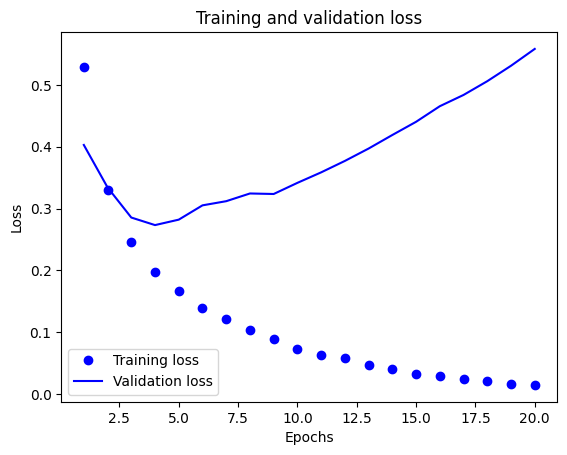

In [24]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Correct the error by using the length of loss_values for determining epochs
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [29]:
# Correctly defining the model with a list of layers directly passed to Sequential
model = Sequential([
    Input(shape=(10000,)),  # Define the input shape
    Dense(16, activation='relu'),  # First dense layer
    Dense(16, activation='relu'),  # Second dense layer
    Dense(1, activation='sigmoid')  # Output layer
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512)

results = model.evaluate(x_test,y_test)


Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6886 - loss: 0.6125
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8875 - loss: 0.3608
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9170 - loss: 0.2614
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9334 - loss: 0.2048
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.8799 - loss: 0.2948


In [30]:
results

[0.295430064201355, 0.8803200125694275]

In [31]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step


array([[0.24390261],
       [0.99744433],
       [0.8758968 ],
       ...,
       [0.0955219 ],
       [0.16289166],
       [0.5209481 ]], dtype=float32)